# Atividades Mecânica estatística  

Compilado de atividades computacionais executadas durante a discipina de mecânica estatística ministradas pelo professor Paulo Campos.

## Atividade 1 

* _Objetivo_: Simular computacionalmente um número M de caminhantes
aleatórios unidimensionais capazes de realizar N passos, e plotar 
histogramas variados de cada uma dessas simulações, assim como calcular 
média e variância para cada uma delas.

* _Sobre a minha simulação_: Foram utilizados como parâmetros aqui todos os 
caminhantes centrados na posição 0, com uma probabilidade de 50% de 
tomar um passo para a direita e 50% de tomar um passo para esquerda. Para 
o algoritmo de decisão implementei um método de Monte Carlo a partir da 
função geradora de números aleatórios (rand()) tomando passos temporais 
no intervalo de 0.1. Conduzi as simulações em C usando o script referenciado 
a seguir, e gerei arquivos para plotar os histogramas em um software externo.

In [ ]:
#include<stdlib.h>
#include<math.h>
#include<stdio.h>
#include<time.h>
int main(){
     int i,j,N=1000,M=1000;
     double p,t,r,x=0,xm, xd;
     FILE*random;
     random = fopen("caminhante.txt","w+");
    
     printf("GERADOR DE ARQUIVO CAMINHANTE ALEATÓRIO\n\n");
     printf("escolha uma probabilidade de passo:\n");
     scanf("%lf", &p);
     printf("escolha um tamanho para os passos:\n");
     scanf("%lf", &t);
     srand(time(NULL));
    
 //lembrar: M caminhantes realizando N passos!
    
     for(j=0;j<M;j++){
         x=0;
         xm=0;
         xd=0;
         for (i=0;i<N;i++){
                 r = rand()/((double)RAND_MAX);
             if(p<r){
                 x=x+t;
             }
             else{
                 x=x-t;
             }
         }
         fprintf(random,"%d %lf\n", j, x);
         xm = (xm + x);
         xd = (xd + x*x);
     }
    xm = xm/M;
    xd = xd/M;
    printf("\n%lf\n",xm);
    printf("%lf\n",xd);
    fclose(random);
    printf("seu arquivo foi criado com sucesso! :)\n");
    return (0);
}


### Simulação 1

* Parâmetros: M = 1000, N = 100, p = 0.5, t = 0.1

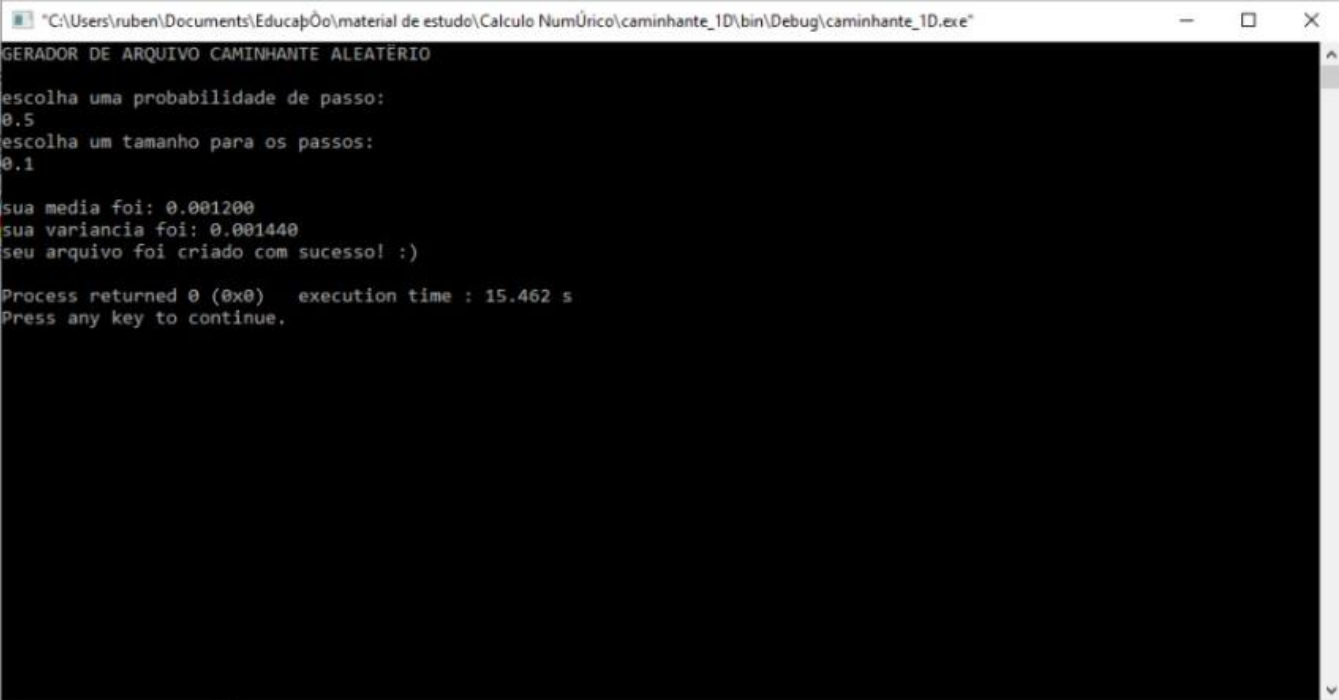

Aqui, podemos observar os cálculos para média e variância como sendo: 
$<x>$ = 0.0012 e $\sigma^2$ = 0.00144 

* Histograma: 

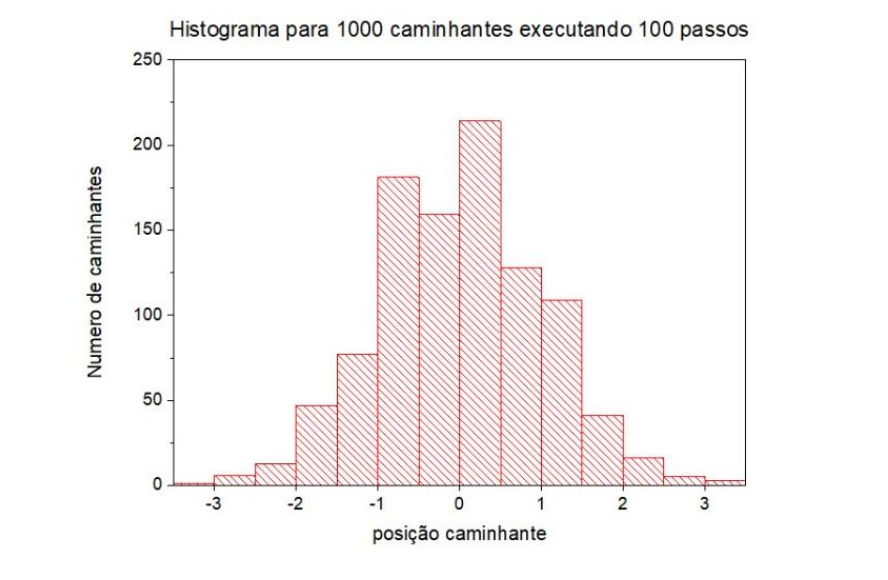

### Simulação 2

* Parâmetros: M = 1000, N = 200, p = 0.5, t = 0.1

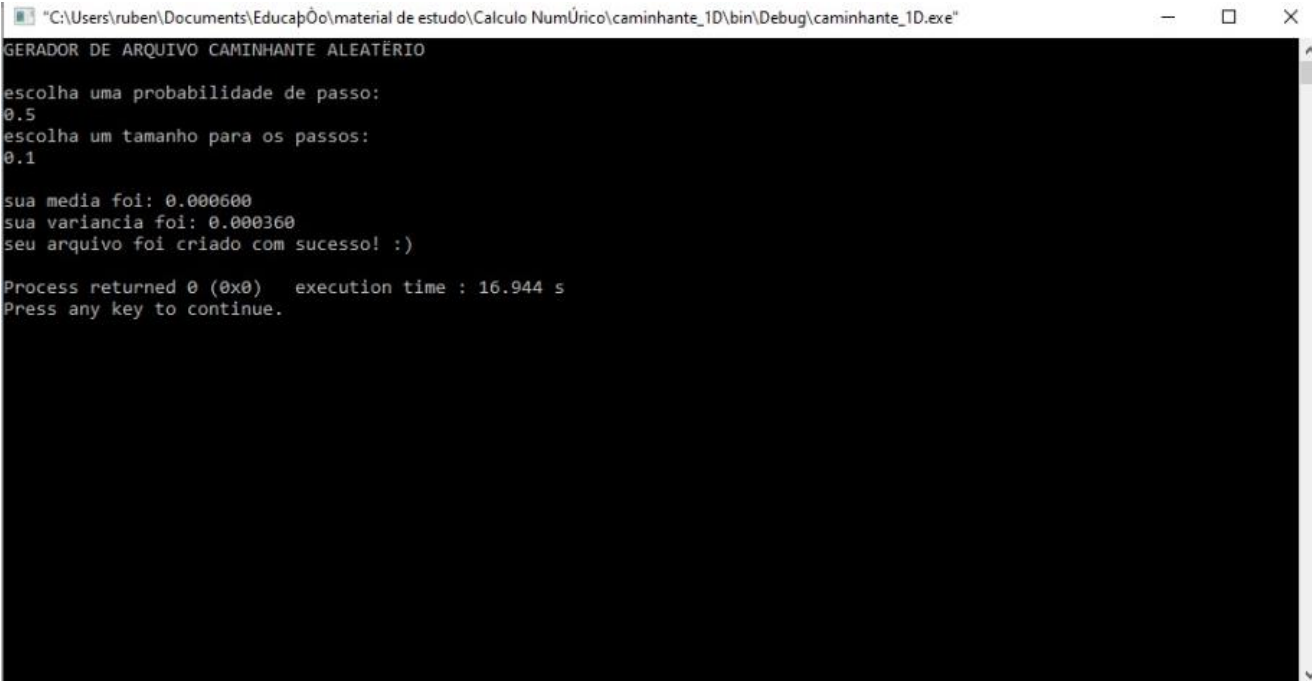

Aqui, podemos observar os cálculos para média e variância como sendo: 
$<x>$ =  0.0006 e $\sigma^2$ =  0.00036

* Histograma: 

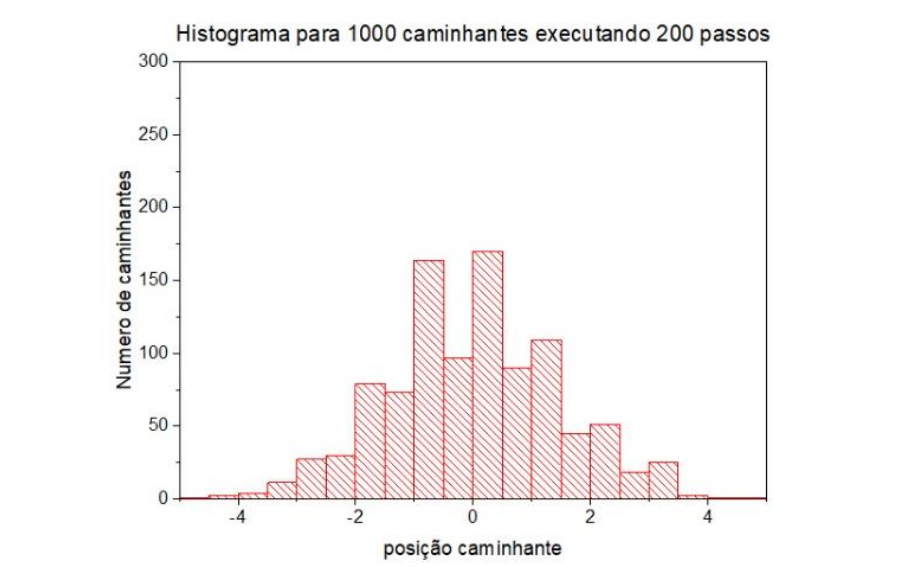

### Simulação 3

* Parâmetros: M = 1000, N = 1000, p = 0.5, t = 0.1


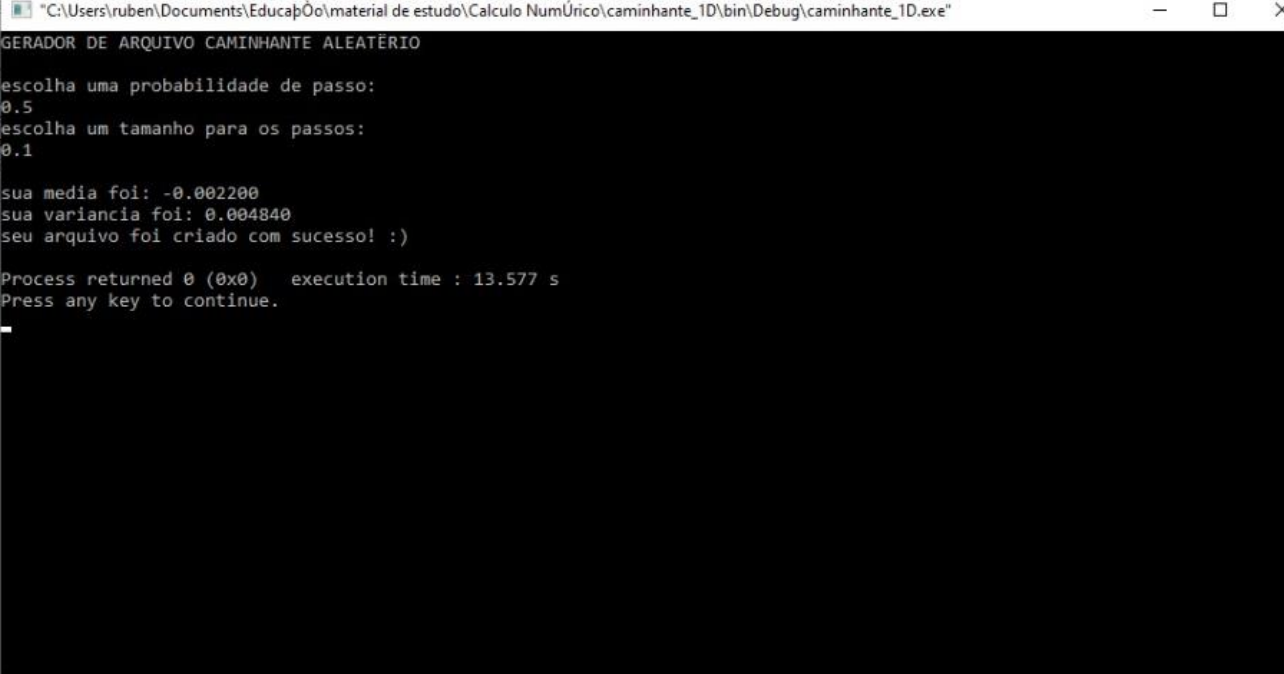

Aqui, podemos observar os cálculos para média e variância como sendo: 
$<x>$ = −0.002200 e $\sigma^2$ =  0.0048

* Histograma: 

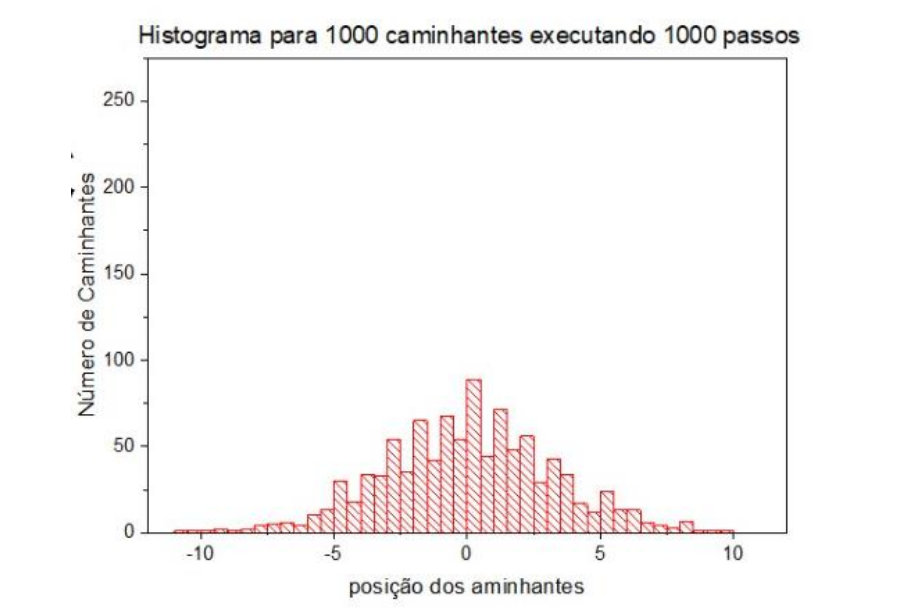

## Atividade 2 

* _Objetivo_: Dada uma distribuição de probabilidade específica, selecione um
número M de pontos arbitrários (onde fixamos M = 1000) onde cada ponto
corresponde a média de N números aleatórios (N = 20, 100, 500); plote de 
forma gráfica a média móvel e observe que, conforme o número N cresce, a 
distribuição fica mais bem definida e a largura da distribuição também muda.
Distribuições a serem analisadas: Gaussiana, Gamma, exponencial e 
uniforme.
* _Sobre a minha simulação_: Primeiramente, elaborei um código em C para 
gerar números aleatórios como usualmente através da função rand() e da 
biblioteca <time.h> . Ao calcular as médias dos valores uando a função 
geradora de números aleatórios (double)RAND_MAX) implementei funções 
para cada uma das funções de distribuição de probabilidade e iterei ela 1000 
vezes como requisitado, salvando os resultados num arquivo .txt com o título 
da função na qual estava chamando naquela execução. Refiz o procedimento 
para cada função 3 vezes criando arquivos com N = 20, 100 e 1000. Com os 
arquivos em mãos, utilizei um software externo de plotagem para gerar cada 
um dos gráficos exibidos no decorrer do trabalho.
Código: segue como exemplo o meu código usado com parâmetros fixados 
para a função de distribuição de probabilidade gaussiana com N = 20.



In [ ]:
#include<stdlib.h>
#include<math.h>
#include<stdio.h>
#include<time.h>


double gaussdp(double g){
    g = exp(pow(-g,2));
    return g;
}

double gammadp(double m){
    if(m <= 0.0){
        return 0;
    }
    if(m > 0.0){
        m = tgamma(m);
    return m;
    }
}

double expdp(double e){
    if(e <= 0.0){
        return 0;
    }
    if(e > 0.0){
        e = exp(-e);
    return e;
    }
}

double uniformdp(double u){
//usando como parametros a = 0.10 e b = 0.75
    if(u < 0.10){
        return 0;
    }
    if(u > 0.75){
        return 1;
    }
    if(0.10 <= u && u <= 0.75){
        u = (u-0.1)/0.65;
    return u;
    }
}

int main(){
     int i,j,N=20,M=1000;
     double r,x,xm, Xm;
     FILE*random;
     random = fopen("fdp_gaussianaN20.txt","w+");
    
 //lembrar: calcular média de N num aleatorios para gerar M pontos da 
distribuição!
 
 
    srand(time(NULL));
    for(j=0;j<M;j++){
        xm = 0;
        for(j=0;j<N;j++){
            r = rand()/((double)RAND_MAX);
            x = (gaussdp(r));
            xm = xm + x;
        } xm = xm/N;
        Xm = Xm + xm;
        fprintf(random,"%d %lf\n", j, xm);
    } Xm = Xm/M;
    printf("a média e igual a: %lf", Xm);
    fclose(random);
    printf("seu arquivo foi criado com sucesso! :)\n");
return (0);
}

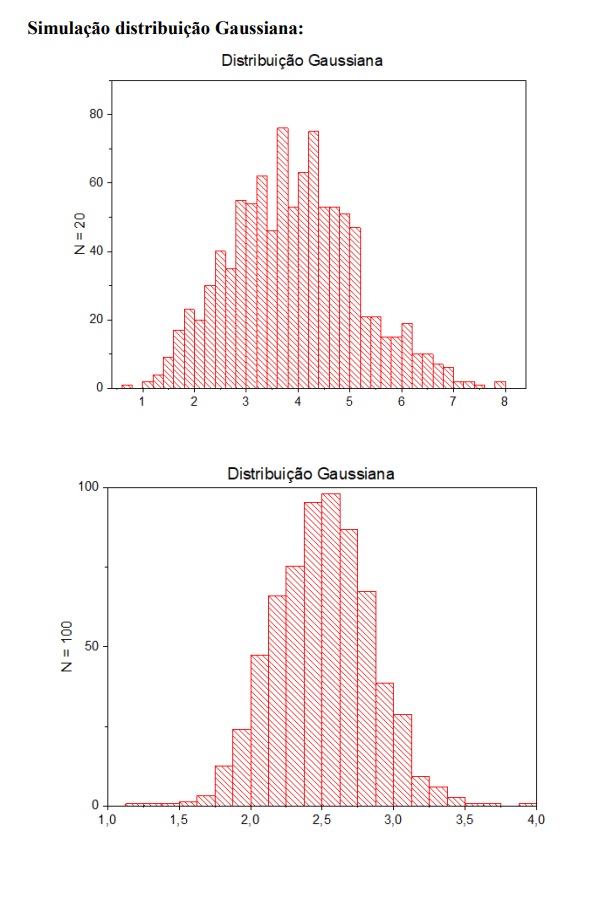

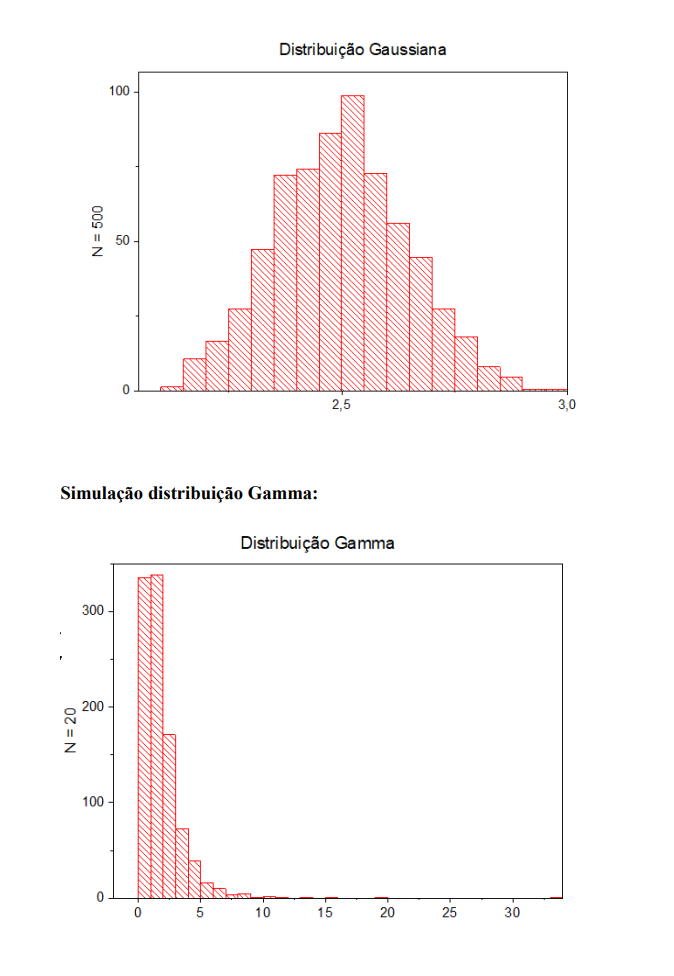

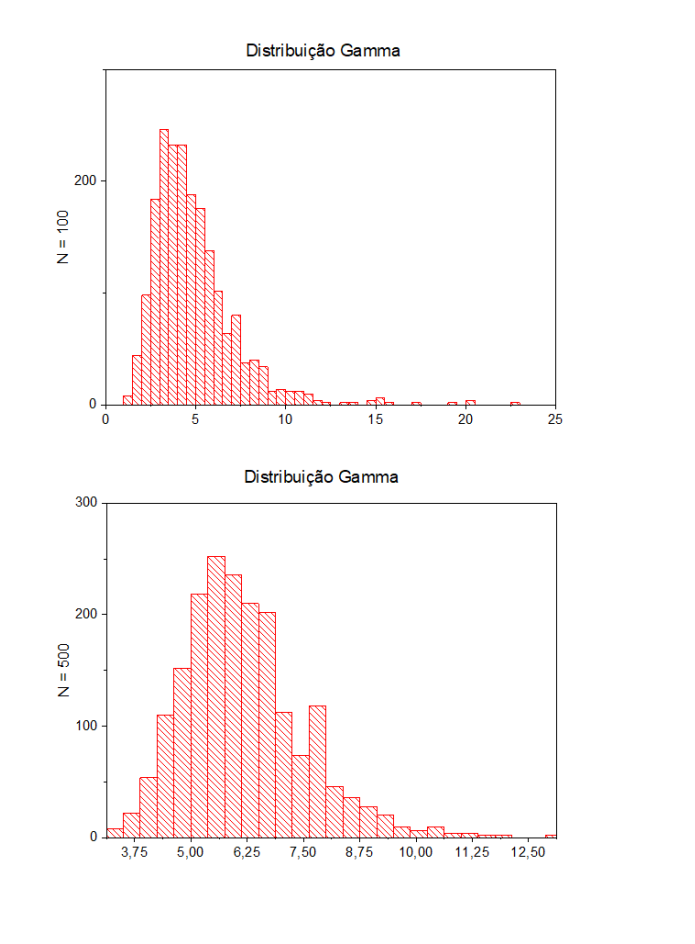

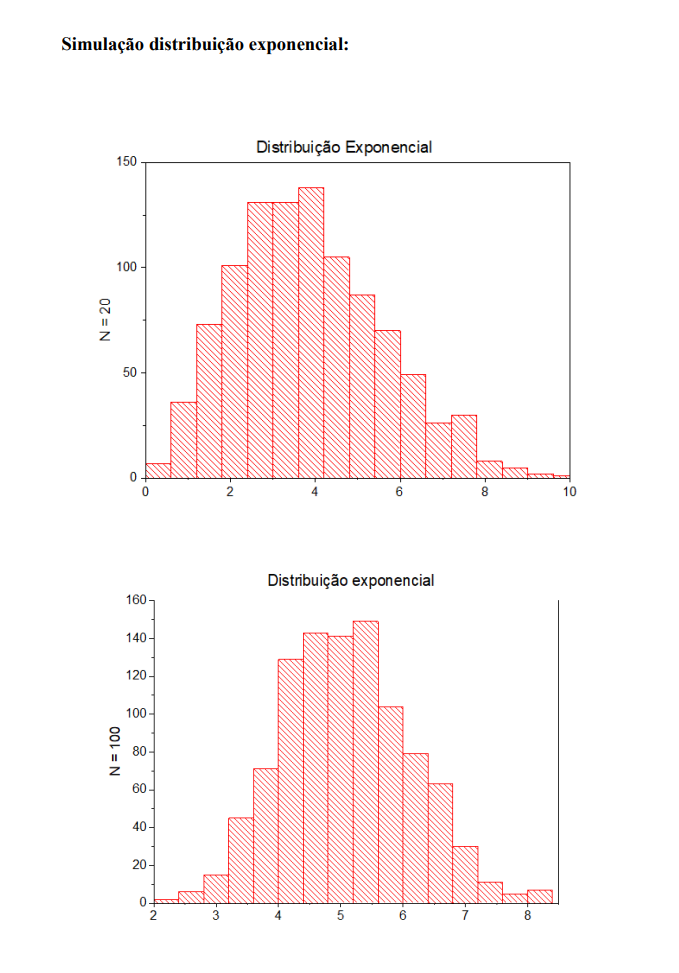

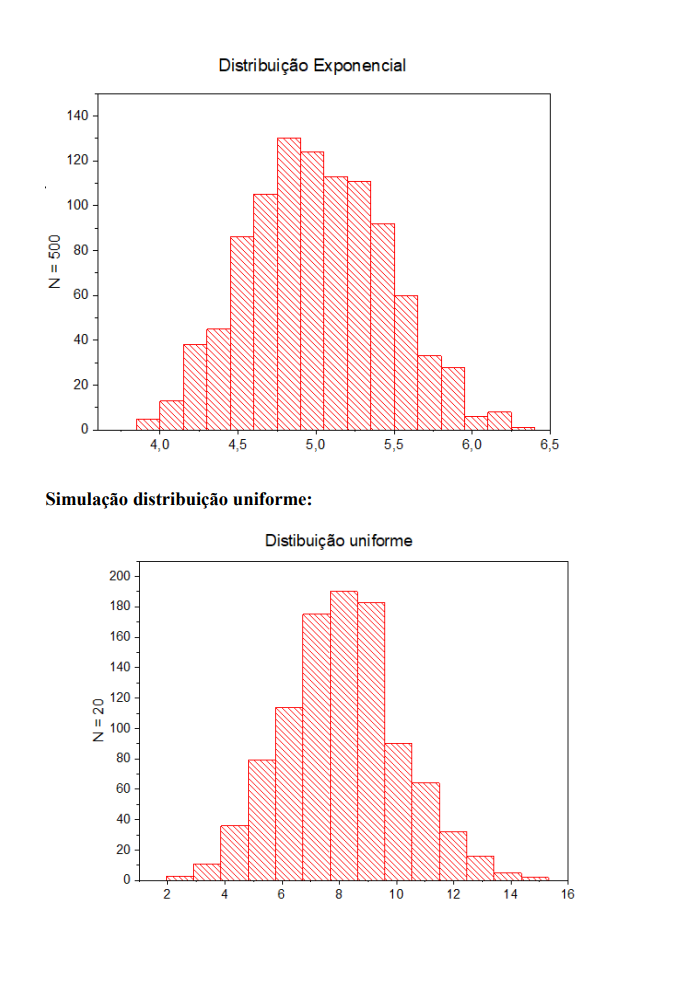

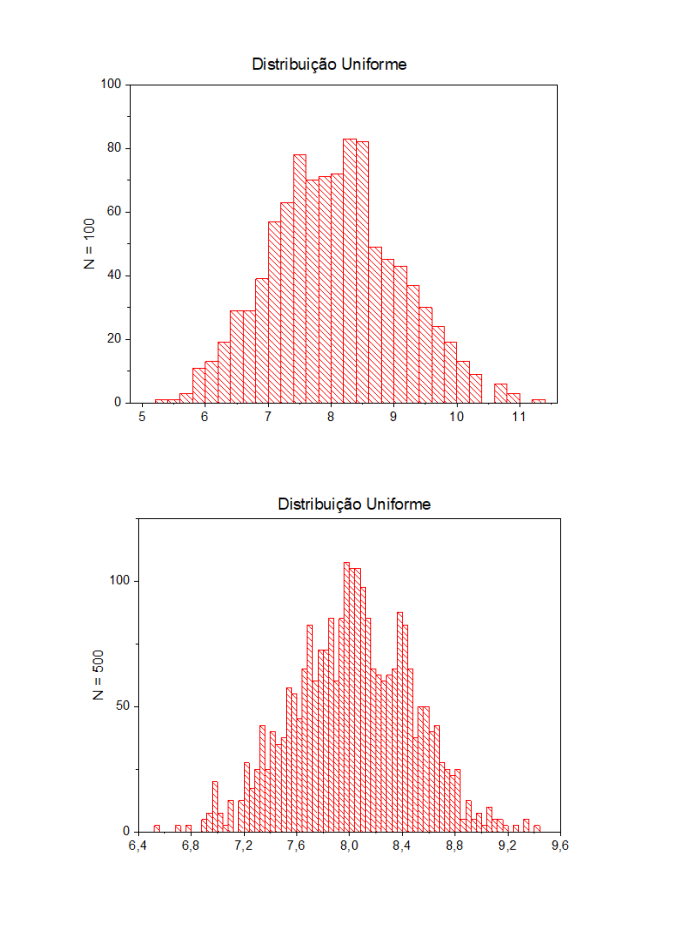








## Atividade 3 Objetivo: Dada uma distribuição de probabilidade específica, selecione um


* _Objetivo_: Elaborar um programa para simular o modelo de Ising em uma rede 
quadrada de duas dimensões, implementando o algoritmo de Monte Carlo, usando um 
sistema ferromagnético com condições de contorno periódicas. Devemos iniciar a partir 
de diferentes configurações iniciais, isto é, os spins devem ser aleatoriamente 
distribuídos; todos de mesmos valores; parte com valor 𝑠1 e parte com valor 𝑠2. Plote 
gráficos para analisar o comportamento do calor específico e da susceptibilidade 
magnética em diferentes regimes de temperatura para um dado tamanho de rede N (n x
n), mantendo registro de quantos passos de Monte Carlo são executados. (utilizado 
como parâmetro para essa construção uma parte da atividade proposta em [2]). 

* _Sobre a simulação_ : Como sabemos, o modelo de Ising consiste numa rede de sítios 
interconectados, cada sítio podendo assumir dois valores distintos $𝑠_1$ e $𝑠_2$. Note que 
temos aqui apenas uma simples representação de um sistema magnético onde o _spin s_, 
pode assumir valores -1 e 1.
A energia (E) do sistema e a sua magnetização (M) são estabelecidas através das 
seguintes relações

$$ E = - J \sum^N_{<i,j>} s_i s_j - B \sum^N_{i = 1} s_j \tag{1}$$

$$ M = \sum^N_{i = 1} s_i \tag{2}$$ 


Onde < 𝑖,𝑗 > representam as interações somente entre os primeiros vizinhos, J é a 
constante de troca do sistema (para sistemas ferromagnéticos temos 𝐽 > 0 e para 
antiferromagnéticos 𝐽 < 0), e B um campo magnético externo qualquer.
O sistema é uma das variações mais simples que apresentam uma transição de fase do 
tipo ordem-desordem, o que permite que usemos ele para representar inclusive outros 
sistemas físicos que possuem esse mesmo tipo de transição, como gás de rede, 
interações sociais, economia, neurociência etc. [4] 

In [ ]:
#include <iostream>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <time.h>
#include <math.h>

#define N 30 //tamanho da rede -1 linha e -1 coluna que vão ser perididas nas iterações
#define Nt 784 //constante pra preencher as bordas periódicamente 
#define J 0.5 //constante ferromagnetismo(+/-); dividimos por 2 para evitar repeticao energias
#define B 0 
#define NE 2 //Vetor para guardar as energias do passo atual e posterior
#define T 5
#define C 10000 //Número de iterações

using namespace std;

void periodico (int M[N][N]){ //Tornando uma matriz quadrada periódica
     int i,j;
     for(j=1;j<(N-1);j++){
         M[0][j] = M[N-2][j];
         M[N-1][j] = M[1][j];
     }
     for(i=1;i<(N-1);i++){
         M[i][0] = M[i][N-2];
         M[i][N-1] = M[i][1];
     }
     M[0][0] = M[N-2][N-2];
     M[0][N-1] = M[N-2][1];
     M[N-1][0] = M[1][N-2];
     M[N-1][N-1] = M[1][1];
}

void energia (int M[N][N], double Energias[NE], double MEM[4], double t){ //Função onde ocorre as mudanças de energia
     int i, j, prob, prob2, de, O[N][N];
     double parametro, sorteio, beta, Eprov;
     for(i=0;i<N;i++){
         for(j=0;j<N;j++){
             O[i][j] = M[i][j];
         }
     }
     prob = rand()%(N-2) + 1; //escolhendo um spin aleatório da rede
     prob2 = rand()%(N-2) + 1;
     Energias[0] = 0;
     Energias[1] = 0;
     for(i=0;i<4;i++){
         MEM[i] = 0;
     }
    for(i=1;i<(N-1);i++){ //Calculando a energia atual
         for(j=1;j<(N-1);j++){
             Energias[0] += -J*((M[i][j]*M[i][j+1]) + (M[i][j]*M[i+1][j]) +
            (M[i][j]*M[i][j-1]) + (M[i][j]*M[i-1][j])) - B*M[i][j];
         }
     }
    O[prob][prob2] = -O[prob][prob2]; //Alterando o spin escolhido
     for(i=1;i<(N-1);i++){ //Calculando a nova energia
         for(j=1;j<(N-1);j++){
             Energias[1] += -J*((O[i][j]*O[i][j+1]) + (O[i][j]*O[i+1][j]) +
            (O[i][j]*O[i][j-1]) + (O[i][j]*O[i-1][j])) - B*O[i][j];
         }
     }
     de = Energias[1] - Energias[0]; //Diferença de energia entre os estados
     if(de>0){ //Analisando o caso onde a energia aumenta
         sorteio = rand()%RAND_MAX;
         sorteio = sorteio/RAND_MAX;
         parametro = exp(-de/t);
         if(sorteio<=parametro){
             M[prob][prob2] = O[prob][prob2];
         }
     }
     for(i=1;i<(N-1);i++){ //Iterando E, E^2, M e M^2
         for(j=1;j<(N-1);j++){
             Eprov = -J*((M[i][j]*M[i][j+1]) + (M[i][j]*M[i+1][j]) + (M[i][j]*M[i][j-1]) +
            (M[i][j]*M[i-1][j])) - B*M[i][j];
             MEM[0] += Eprov;
             MEM[1] += Eprov*Eprov;
             MEM[2] += M[i][j];
             MEM[3] += M[i][j]*M[i][j];
         }
     }
}

int main(){
     int i, j, M[N][N], k; //k é o contador de iterações
     double prob, t, Energias[NE], MEM[4]; //MEM guarda as grandezas desejadas (E, E^2, M e M^2)
     FILE* data = fopen("Dados.txt", "w+");
     srand((unsigned)time(NULL));
     for(t=0.5;t<=T;t+=0.1){ //Loop para analisar diferentes temperaturas
         for(i=0;i<NE;i++){ //Zerando os dados
             Energias[i] = 0;
         }
     for(i=0;i<4;i++){
         MEM[i] = 0;
     } 
    for(i=1;i<(N-1);i++){ //Definindo a população inicial
         for(j=1;j<(N-1);j++){
         /*prob = rand()%RAND_MAX;
         prob = prob/RAND_MAX;
     if(prob<=0.5){
         M[i][j] = 1; //isso daqui foi de quando estavamos gerando condição incial aleatoria, antes da dica do professor de começar todos em +/-1 
     } else {
         M[i][j] = -1;
        }*/
     M[i][j] = 1;
     }
 }
     periodico(M);
    for(k=0;k<C;k++){ // Loop das iterações
         energia(M,Energias,MEM,t);
         periodico(M);
     }
     //fprintf(data,"%g %g %g %g %g",t,MEM[0]/Nt,fabs(MEM[2])/Nt, 
    (float)((MEM[1]/Nt)-(MEM[0]*MEM[0])/(Nt*Nt))/(t*t), (float)((MEM[3]/Nt)-
    (MEM[2]*MEM[2])/(Nt*Nt))/t);
    //desistimos desse printf por conta de correlação
     fprintf(data,"%g %g ",t,MEM[0]/Nt);
     for(k=0;k<500;k++){ // Loop das iterações
         energia(M,Energias,MEM,t);
         periodico(M);
     }
     fprintf(data,"%g ",fabs(MEM[2])/Nt);
    for(k=0;k<500;k++){ // Loop das iterações
         energia(M,Energias,MEM,t);
         periodico(M);
    }
     fprintf(data,"%g ",(float)((MEM[1]/Nt)-(MEM[0]*MEM[0])/(Nt*Nt))/(t*t));
     for(k=0;k<500;k++){ // Loop das iterações
         energia(M,Energias,MEM,t);
         periodico(M);
     }
     fprintf(data,"%g",(float)((MEM[3]/Nt)-(MEM[2]*MEM[2])/(Nt*Nt))/t);
     fprintf(data,"\n");
     cout << t << " ok" << endl;
     }
     fclose(data);
}

* _Trabalho gráfico_ : Nessa sessão podemos observar como prometido os plots 
referentes as propriedades de susceptibilidade magnética e calor específico para 
fazermos uma análise quantitativa mais eficiente do nosso sistema. Para isso, 
consideramos que o sistema precisa rodar o algoritmo de metropolis várias vezes até 
estar termalizado, algoritmo esse que consiste no seguinte passo a passo:

1. Testamos uma modificação aleatória no sistema;
2. Calculamos a diferença de energia devido a esta modificação;
3. Se ∆𝐸 ≤ 0, a nova configuração é aceita;
4. Se ∆𝐸 > 0, é preciso calcular 𝜔 = exp(−𝛽∆𝐸) e gerar um número aleatório 𝑟 ∈
[0,1] uniformemente. Se 𝑟 ≤ 𝜔 a nova configuração é aceita; se 𝑟 > 𝜔 a modificação é 
descartada.


Como vamos calcular as grandezas < 𝐸 >, < $𝐸^2$ >, < 𝑀 > 𝑒 < $𝑀^2$ > durante nossa 
simulação, precisamos garantir que um número razoável de passos de Monte Carlo 
ocorra para o sistema estar em um estado termalizado [1][2], para somente então 
começarmos a calcular essas médias. Após isso, os observáveis são calculados de 
acordo com as seguintes fórmulas:

Para o Calor específico (C), vamos ter

$$ C = \frac{<E^2> - <E>^2}{k_b T^2}$$

E para a Susceptibilidade magnética (𝜒)

$$ \chi = = \frac{<M^2> - <M>^2}{k_b T} $$ 

Ambos os gráficos vão ser gerados em função da temperatura que variamos no 
código/sistema.

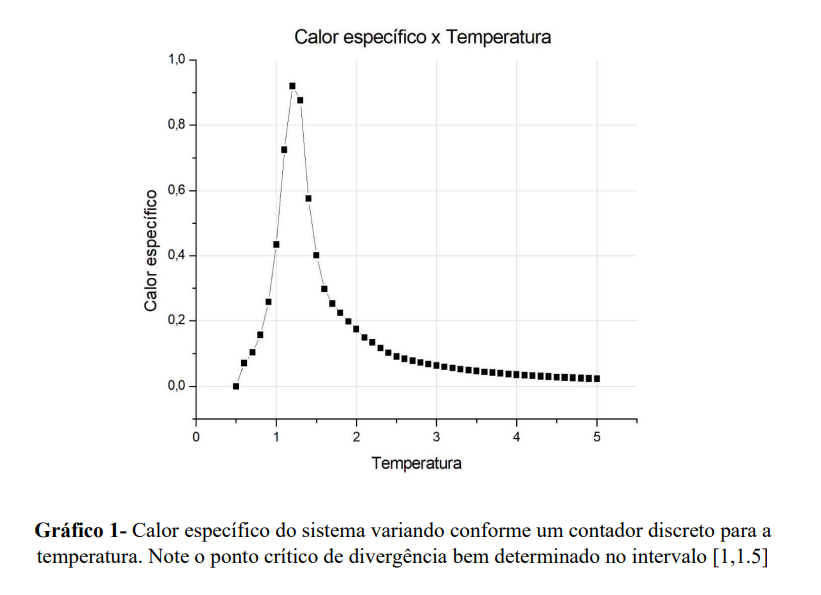

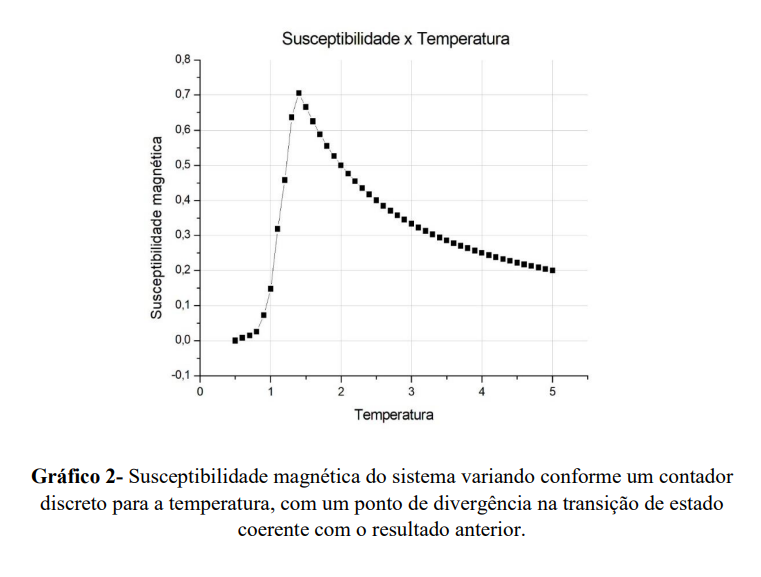

Dado a determinação coerente com o esperado desses observáveis, também tomamos a 
liberdade de introduzir os gráficos que são geralmente referenciados na literatura [1][3] 
para efeito de comparação do bom andamento da simulação do nosso sistema.

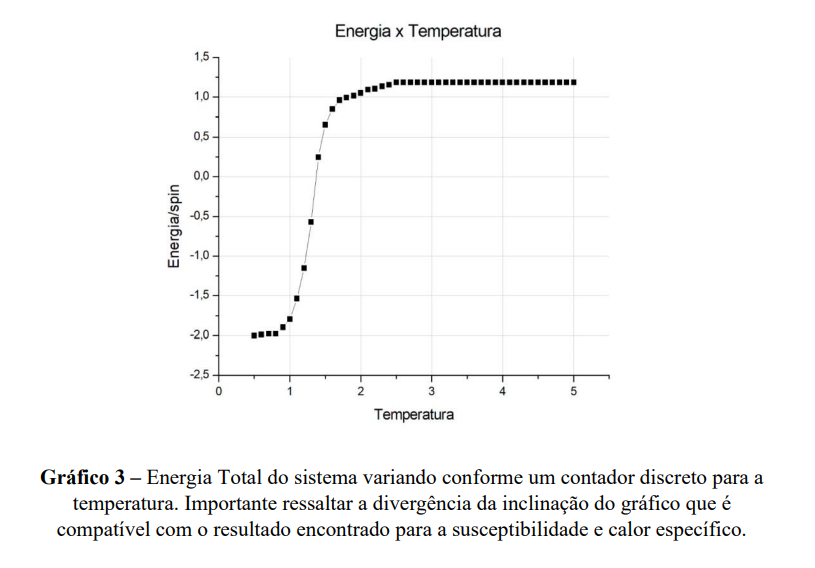

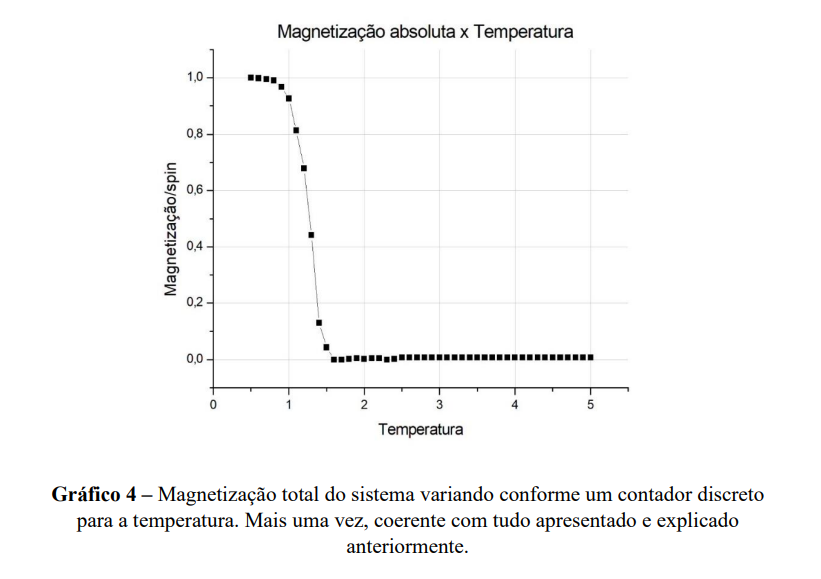

Acreditamos que esses gráficos são igualmente importantes para a visualização e um 
bom entendimento do funcionamento do sistema proposto. A temperatura crítica 𝑇𝑐 que 
caracteriza a perda das propriedades coletivas dos 𝑠𝑝𝑖𝑛𝑠 e consequentemente marca a 
perda do fenômeno de histerese [5], é coerente em todos os gráficos apresentados (e 
pode ser determinada com precisão dado um maior poder de processamento para gerar 
uma rede de spins maior que N=100).



## Referências 

1. Antunes, Felipe. (2012). Estudo do Modelo de Ising Bidimensional Utilizando o 
Algorítimo de Metropolis. 10.13140/RG.2.1.2354.1840.
2. Cabral, Leonardo. (2018.1). Módulo 11 – Simulação de Ensembles estatísticos 
utilizando Monte Carlo. Notas de aula da disciplina Métodos computacionais 
para física.
3. Barry M. McCoy and Tai Tsun Wu (1973), The Two-Dimensional Ising Model. 
Harvard University Press, Cambridge Massachusetts, ISBN 0-674-91440-6.
4. «PiresMA/Ising_like_models_interdisciplinary_applications». GitHub. 
Consultado em 12 de julho de 2021.
5. Modelo Ising – Wikipédia, a enciclopédia livre (wikipedia.org)